<a href="https://colab.research.google.com/github/igornunespatricio/Python-Course/blob/main/Data%20Analysis/Data_Analysis_Contoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading DB

Reading and merging tables

In [2]:
# reading tables
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';', encoding_errors='ignore', encoding='utf-8')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', usecols=['ID Produto', 'Nome do Produto'],encoding_errors='ignore', encoding='utf-8')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', usecols=['ID Loja', 'Nome da Loja'], encoding_errors='ignore', encoding='utf-8')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', usecols=['ID Cliente', 'E-mail'], encoding_errors='ignore', encoding='utf-8')

In [3]:
# displaying tables
display(vendas_df)
display(produtos_df)
display(lojas_df)
display(clientes_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,Nome do Produto,ID Produto
0,Contoso Wireless Laser Mouse E50 Grey,873
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,879
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,880
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,881
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,882
...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,1602
1686,SV DVD 9-Inch Player Portable M300 Silver,1606
1687,SV DVD 12-Inch Player Portable M400 Silver,1607
1688,SV DVD 9-Inch Player Portable M300 White,1611


,ID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


,ID Cliente,E-mail
0,1,glanfranchi0@mayoclinic.com
1,2,lroseblade1@bigcartel.com
2,3,gishchenko2@moonfruit.com
3,4,bjedrzejewsky3@e-recht24.de
4,5,sbredbury4@sitemeter.com
...,...,...
39499,39500,brandy0@adventure-works.com
39500,39501,alicia12@adventure-works.com
39501,39502,connie4@adventure-works.com
39502,39503,shawn23@adventure-works.com


In [4]:
# joining/merging tables
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente', )
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980642 entries, 0 to 980641
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
 10  Nome do Produto       980642 non-null  object
 11  Nome da Loja          980642 non-null  object
 12  E-mail                980642 non-null  object
dtypes: int64(8), object(5)
memory usage: 104.7+ MB


# Data Manipulation

In [5]:
# renaming column names
vendas_df = vendas_df.rename(
    columns={
        'E-mail': 'E-mail Cliente'
    }
)
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980642 entries, 0 to 980641
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
 10  Nome do Produto       980642 non-null  object
 11  Nome da Loja          980642 non-null  object
 12  E-mail Cliente        980642 non-null  object
dtypes: int64(8), object(5)
memory usage: 104.7+ MB


In [9]:
# date columns to date type and adding yearyear, month and day columns
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format='%d/%m/%Y')
vendas_df['Ano da Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mês da Venda'] = vendas_df['Data da Venda'].dt.month
vendas_df['Dia da Venda'] = vendas_df['Data da Venda'].dt.day
display(vendas_df.head(10))
vendas_df.info()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail Cliente,Ano da Venda,Mês da Venda,Dia da Venda
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017,1,1
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp,2017,11,23
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp,2017,3,20
3,18610,2017-01-08,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp,2017,1,8
4,287704,2017-04-23,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp,2017,4,23
5,373600,2017-05-22,29/05/2017,7,33,1284,1,6825,5,0,Contoso Mini Battery Charger Kit E320 Black,Loja Contoso Berthoud,rbrumfieldmy@ameblo.jp,2017,5,22
6,873068,2017-11-21,22/11/2017,1,275,246,5,6825,13,1,Contoso Home Theater System 4.1 Channel M1410 ...,Loja Contoso Busan,rbrumfieldmy@ameblo.jp,2017,11,21
7,26350,2017-01-12,18/01/2017,6,21,568,2,6825,9,0,Proseware Projector 480p DLP12 Silver,Loja Contoso Wheat Ridge,rbrumfieldmy@ameblo.jp,2017,1,12
8,180875,2017-03-16,16/03/2017,0,268,975,6,6825,4,0,A. Datum Ultra Compact Digital Camera M190 Pink,Loja Contoso Tokyo No.2,rbrumfieldmy@ameblo.jp,2017,3,16
9,413808,2017-06-04,06/06/2017,2,185,1197,1,6825,10,0,Fabrikam Budget Moviemaker 1/2'' 3mm E300 Grey,Loja Contoso Roanoke,rbrumfieldmy@ameblo.jp,2017,6,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 980642 entries, 0 to 980641
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Numero da Venda       980642 non-null  int64         
 1   Data da Venda         980642 non-null  datetime64[ns]
 2   Data do Envio         980642 non-null  object        
 3   ID Canal              980642 non-null  int64         
 4   ID Loja               980642 non-null  int64         
 5   ID Produto            980642 non-null  int64         
 6   ID Promocao           980642 non-null  int64         
 7   ID Cliente            980642 non-null  int64         
 8   Quantidade Vendida    980642 non-null  int64         
 9   Quantidade Devolvida  980642 non-null  int64         
 10  Nome do Produto       980642 non-null  object        
 11  Nome da Loja          980642 non-null  object        
 12  E-mail Cliente        980642 non-null  object        
 13 

In [17]:
# changing price of specific products using loc
new_produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', encoding_errors='ignore', encoding='utf-8')
new_produtos_df.set_index('Nome do Produto', inplace=True)
display(new_produtos_df.head())
new_produtos_df.loc['Contoso Wireless Laser Mouse E50 Grey', 'Preco Unitario'] = 23
display(new_produtos_df.head())
new_produtos_df.loc[new_produtos_df['ID Produto']==873, 'Preco Unitario'] = 10
display(new_produtos_df.head())

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econmico,"10,69","20,96",873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,882,22


,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econmico,"10,69",23,873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,882,22


,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econmico,"10,69",10,873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econmico,"6,63",13,882,22


# Data Analysis

## Per Client

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail Cliente, Length: 38907, dtype: int64

<Axes: title={'center': 'Top 20 clients'}>

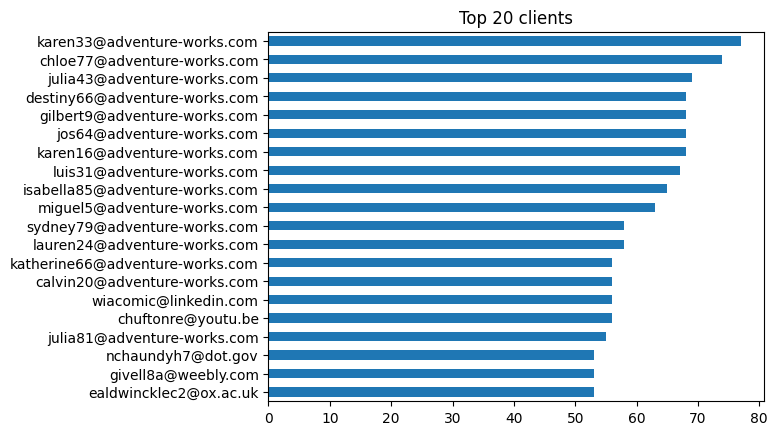

In [ ]:
# how many times clients bought something
buying_freq_client = vendas_df['E-mail Cliente'].value_counts()
display(buying_freq_client)
# top clients in a chart
top = 20
buying_freq_client.head(top).sort_values().plot(kind='barh', title=f'Top {top} clients')

<Axes: title={'center': '# of Sales'}, ylabel='Frequency'>

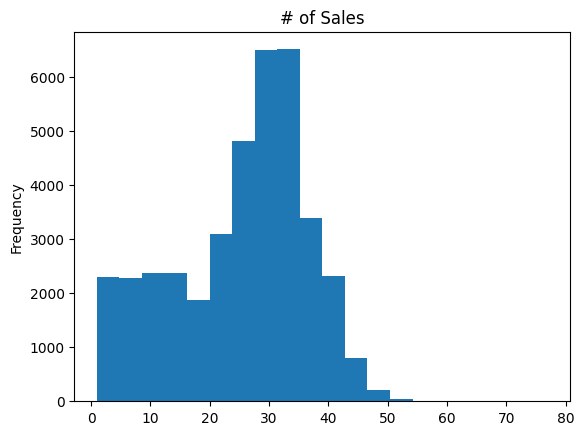

In [ ]:
buying_freq_client.plot(kind='hist', bins=20, title='# of Sales')

There is no mutch difference per client. We can see by the horizontal barplot that the top client is just few sales above the second position. Maybe this information can be used to send a promotion code to top clients.

## Per Store

### Average Amount Sold Per Sale

,AmountSold,SalesAmount,AverageAmountSoldPerSale
Nome da Loja,,,
Loja Contoso Catalog,1029117,47324,21.746196
Loja Contoso North America Online,701961,42722,16.430902
Loja Contoso Asia Online,578458,37502,15.424724
Loja Contoso North America Reseller,520176,35353,14.713773
Loja Contoso Europe Online,616845,42771,14.422038
...,...,...,...
Loja Contoso Roma,7243,819,8.843712
Loja Contoso Berlin,379,43,8.813953
Loja Contoso Dusseldorf,8440,989,8.533873


<Axes: title={'center': 'Top 10 stores by Average Amount Sold Per Sale'}, ylabel='Nome da Loja'>

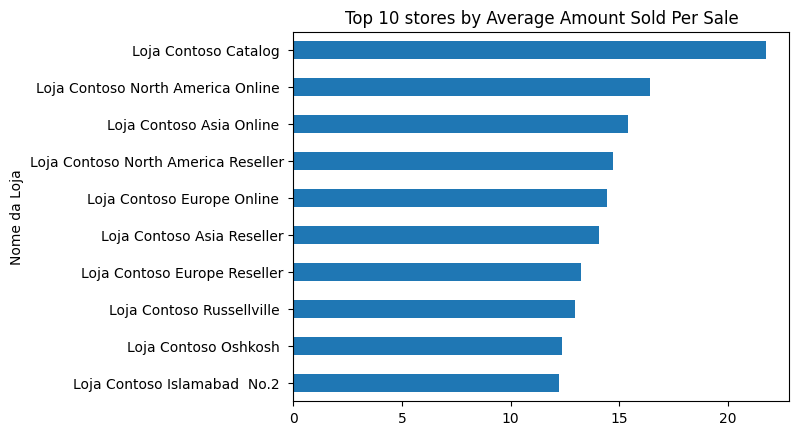

In [ ]:
# store with the biggest average amount sold per sale
groupedAmountSoldByStore = vendas_df.groupby('Nome da Loja').agg(
    **{
        'AmountSold': pd.NamedAgg('Quantidade Vendida', np.sum),
        'SalesAmount': pd.NamedAgg('Numero da Venda', np.size)
    }
)
groupedAmountSoldByStore['AverageAmountSoldPerSale'] = groupedAmountSoldByStore['AmountSold']/groupedAmountSoldByStore['SalesAmount']
groupedAmountSoldByStore.sort_values(by='AverageAmountSoldPerSale', ascending=False, inplace=True)
display(groupedAmountSoldByStore)
# top stores by biggest average amount sold per sale
top = 10
groupedAmountSoldByStore['AverageAmountSoldPerSale'].head(top)[::-1].plot(kind='barh', title=f'Top {top} stores by Average Amount Sold Per Sale')

In [ ]:
# get only max and min values and indexes
maxAvgAmountPerSale = groupedAmountSoldByStore['AverageAmountSoldPerSale'].max()
storeMaxAvgAmountPerSale = groupedAmountSoldByStore['AverageAmountSoldPerSale'].idxmax()
print(f'The company with the highest average amount sold per sale was {storeMaxAvgAmountPerSale} with an average of {maxAvgAmountPerSale}')

minAvgAmountPerSale = groupedAmountSoldByStore['AverageAmountSoldPerSale'].min()
storeMinAvgAmountPerSale = groupedAmountSoldByStore['AverageAmountSoldPerSale'].idxmin()
print(f'The company with the lowest average amount sold per sale was {storeMinAvgAmountPerSale} with an average of {minAvgAmountPerSale}')


The company with the highest average amount sold per sale was Loja Contoso Catalog  with an average of 21.746196433099485
The company with the lowest average amount sold per sale was Loja Contoso Venezia  with an average of 8.068965517241379


We can see that Loja Contoso Catalog is has the highest average amount sold per sale and that it's by far the best average compared to other stores. On the other hand, Loja Contoso Venezia has the lowest average.
A solution would be to dive deeper in the data to try and understand why Loja Contoso Catalog is having the highest average and try to replicate the processes to stores with the lowest average, including Loja Contoso Venezia.

### Returned Sales

In [ ]:
vendas_df.dtypes

Numero da Venda          int64
Data da Venda           object
Data do Envio           object
ID Canal                 int64
ID Loja                  int64
ID Produto               int64
ID Promocao              int64
ID Cliente               int64
Quantidade Vendida       int64
Quantidade Devolvida     int64
Nome do Produto         object
Nome da Loja            object
E-mail Cliente          object
dtype: object

In [ ]:
# % of returned items per store
groupedSoldReturn = vendas_df.groupby('Nome da Loja').agg(
    **{
        'Amount Sold': pd.NamedAgg('Quantidade Vendida', np.sum),
        'Amount Returned': pd.NamedAgg('Quantidade Devolvida', np.sum)
    }
)
groupedSoldReturn['% Returned'] = 100 * groupedSoldReturn['Amount Returned']/groupedSoldReturn['Amount Sold']
groupedSoldReturn.sort_values(by='% Returned', inplace=True, ascending=False)
groupedSoldReturn

,Amount Sold,Amount Returned,% Returned
Nome da Loja,,,
Loja Contoso Venezia,234,6,2.564103
Loja Contoso Dallas,436,10,2.293578
Loja Contoso Glasgow,10181,169,1.659955
Loja Contoso Dusseldorf,8440,140,1.658768
Loja Contoso Roma,7243,116,1.601546
...,...,...,...
Loja Contoso Marseille,370,3,0.810811
Loja Contoso Racine No.2,253,2,0.790514
Loja Contoso Oshkosh,4880,37,0.758197


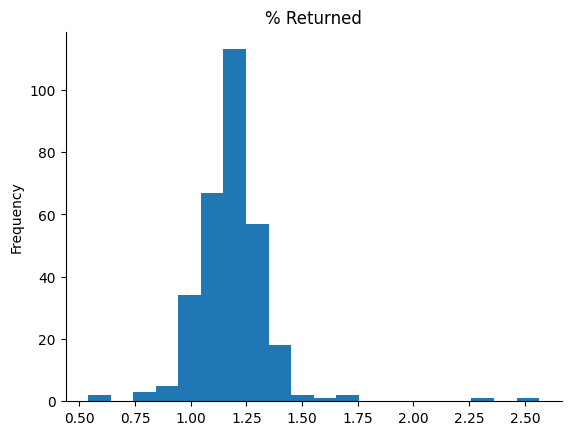

In [ ]:
groupedSoldReturn['% Returned'].plot(kind='hist', bins=20, title='% Returned')
plt.gca().spines[['top', 'right',]].set_visible(False)

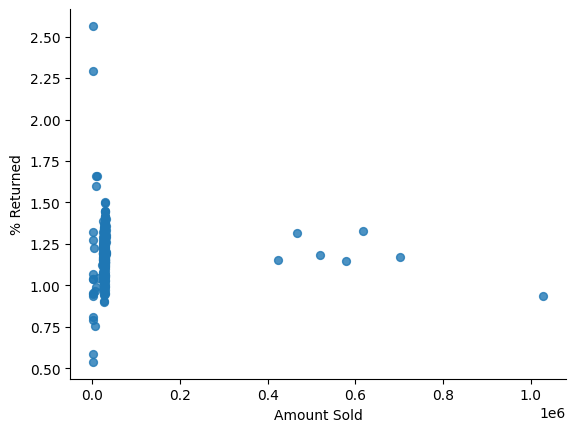

In [ ]:
groupedSoldReturn.plot(kind='scatter', x='Amount Sold', y='% Returned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# highest % returned
print('Stores with highest % returned.')
display(groupedSoldReturn[groupedSoldReturn['% Returned'] > 2])
print('\n\n')
# highest amount sold and average % returned
print('Stores with highest amount sold and average % returned.')
display(groupedSoldReturn[groupedSoldReturn['Amount Sold'] > 0.4e6])

Stores with highest % returned.


,Amount Sold,Amount Returned,% Returned
Nome da Loja,,,
Loja Contoso Venezia,234,6,2.564103
Loja Contoso Dallas,436,10,2.293578





Stores with highest amount sold and average % returned.


,Amount Sold,Amount Returned,% Returned
Nome da Loja,,,
Loja Contoso Europe Online,616845,8174,1.325130
Loja Contoso Europe Reseller,466704,6153,1.318395
Loja Contoso North America Reseller,520176,6165,1.185176
Loja Contoso North America Online,701961,8206,1.169011
Loja Contoso Asia Reseller,423842,4877,1.150665
Loja Contoso Asia Online,578458,6646,1.148917
Loja Contoso Catalog,1029117,9615,0.934296


By looking the % returned by store, it can be seen from the table and histogram that Loja Contoso Venezia and Loja Contoso Dallas have the worst percentages. Unfortunatelly, this fact sums up with the previous analysis of average amount sold per sale done before, indicating once more the necessity to pay attention to Loja Contoso Venezia due to it's low performances.

By looking to the scatter plot which presents the amount sold per company by % returned, it's easy to see 3 groups of companies:
1.   first group the two companies already mentioned before that needs attention
2.   second group with average companies (no discrepancy in % returned)
3.   third group with 7 companies with highest amount sold and average % returned.

This third group should be analyzed and understood its processes, so they can be applied to other stores, with more focus to Loja Contoso Catalog, which appeared as the best store in Average Amount Sold Per Sale.


